In [1]:
import os
from nltk.stem.porter import *
import re
import numpy as np

import argparse


import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.style.use('ggplot')
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']


In [2]:

stopwords = ["a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder"]
stopwords = set(stopwords)
stemmer = PorterStemmer()
doc_freq = dict()
term_freq = dict()
tfidf = dict()



In [3]:
def tokenization(content):
    content = [re.sub(r"[^a-zA-Z0-9]+", '', word) for word in content]
    content = [word.replace(',', '').replace('.', '').replace('\'', '').replace('\n', '') for word in content]
    content = [stemmer.stem(word) for word in content] # Stemming using Porter’s algorithm
    content = [word for word in content if word not in stopwords and len(word) != 0] # Stopword removal

    return content

In [4]:
def read_all_doc():
    for root, dirs, files in os.walk("IRTM"):
        for file in files:
            if ".txt" not in file:
                continue
            # print(os.path.join(root, file))
            filename = os.path.join(root, file)
            corpus = set()
            with open(filename, "r") as f:
                contents = f.readlines()
                for content in contents:
                    text = content.lower()
                    text = text.split(" ")

                    text = tokenization(text)
                    corpus.update(text)
                    
            for word in corpus:
                doc_freq[word] = doc_freq.setdefault(word, 0) + 1
    pass

In [5]:
def calc_tfidf(idf, dict_ind):
    tfidf = []
    for fn in range(1, 1096):
        filename = "./IRTM/" + str(fn) + ".txt"
        weight = dict()
        with open(filename, "r") as f:
            contents = f.readlines()
            for content in contents:
                text = content.lower()
                text = text.split(" ")

                text = tokenization(text)
                for word in text:
                    weight[word] = weight.setdefault(word, 0) + 1
            f.close()
        score = np.zeros(len(dict_ind))
        for word in weight:
            score[dict_ind[word]] = weight[word] * idf[word]
        score /= np.sqrt(np.dot(score, score))
        tfidf.append(score)
    return tfidf

In [6]:
def generate_term_index(inv_doc_freq):
    dictionary_index = {}
    cnt_ind = 0
    for word in inv_doc_freq:
        dictionary_index[word] = cnt_ind
        cnt_ind += 1
    return dictionary_index

In [7]:

class node:
    def __init__(self, similarity, index):
        self.similarity = similarity
        self.index = index


In [8]:
class p_queue:
    def __init__(self):
        self.items = [0] * 2000
        self.list_size = 0
        self.name2position = {}
        self.position2name = {}
    def __str__(self):
        return str(self.items)
    def _is_leaf(self, pos):
        if 2 * pos > self.list_size:
            return True
        return False
    def _swap(self, first, second):
        self.items[first], self.items[second] = (self.items[second], self.items[first])
        
        first_name = self.position2name[first]
        second_name = self.position2name[second]
        self.position2name[first], self.position2name[second] = self.position2name[second], self.position2name[first]
        self.name2position[first_name], self.name2position[second_name] = self.name2position[second_name], self.name2position[first_name]
    
    def _remove_last(self):
        last_name = self.position2name[self.list_size]
        self.position2name.pop(self.list_size, None)
        self.name2position.pop(last_name, None)
        self.items[self.list_size] = 0
        self.list_size -= 1
        
    def insert(self, node):
        name = node.index
        number = node.similarity
        pos = self.list_size + 1
#         print(pos)
        self.items[pos] = number
        self.name2position[name] = pos
        self.position2name[pos] = name
        # propagate the number
        while 1:
            if pos == 1:
                break
            parent = pos // 2
            if number > self.items[parent]:
                self._swap(parent, pos)
                pos = parent
            else:
                break
        self.list_size += 1
        
    def heapify(self, pos):
        root = pos
        # Sink the node
        while not self._is_leaf(root):
            left_child = 2 * root
            right_child = 2 * root + 1
            if (self.items[root] < self.items[left_child]) or (self.items[root] < self.items[right_child]):
                if self.items[left_child] < self.items[right_child]:
                    self._swap(root, right_child)
                    root = left_child
                else:
                    self._swap(root, left_child)
                    root = right_child
            else:
                # root is the largest --> break
                break
    def pop_top(self):
        if len(self.items) == 0:
            return None
        top_item = self.items[1]
        self._swap(1, self.list_size)
        self._remove_last()
        self.heapify(pos = 1)
        return top_item
    def pop(self, name):
        position = self.name2position[name]
        self._swap(position, self.list_size)
        self._remove_last()
        self.heapify(pos = position)
        return
    def clear(self):
        self.items = [0] * 2000
        self.name2position.clear()
        self.position2name.clear()
        self.list_size = 0
    def get_top(self):
        return self.items[1]
    def get_top_name(self):
        return self.position2name[1]
        
        


In [41]:
read_all_doc()


doc_freq = {k: v for k, v in sorted(doc_freq.items(), key=lambda item: item[0])}


inv_doc_freq = {k: np.log10((1095)/ (v)) for k, v in doc_freq.items() }
dictionary_index = generate_term_index(inv_doc_freq)

tfidf_score = calc_tfidf(inv_doc_freq, dictionary_index)
tfidf_score = np.array(tfidf_score)


In [49]:
def calc_similarity(i, k1, k2):
    return min(np.dot(i, k1), np.dot(i, k2))

In [79]:
similarity_score = np.matmul(tfidf_score, tfidf_score.T)
choosable = [True] * len(similarity_score)
priority_queue = [p_queue() for i in range(1095)]
for i in range(len(similarity_score)):
    for j in range(len(similarity_score)):
#         print(j)
        if j == i:
            continue
        priority_queue[i].insert(node(similarity_score[i, j], j))
#     print(len(priority_queue[i].name2position))

In [80]:
clustering_result = {k: [k] for k in range(1095)}

In [81]:
cluster_merge_sim = []

number_of_cluster = 20
for k in range(1, len(similarity_score)):
    if len(clustering_result) == number_of_cluster:
        break
    max_sim = 0
    max_sim_pos = 0

    for i in range(len(priority_queue)):
        if choosable[i] and priority_queue[i].get_top() >= max_sim:
            max_sim = priority_queue[i].get_top()
            max_sim_pos = i
    k2 = priority_queue[max_sim_pos].get_top_name()
    if max_sim_pos > k2:
        max_sim_pos , k2 = k2, max_sim_pos
    # We want to ensure we are merging into clusters with smaller index
    
    choosable[k2] = False
    priority_queue[max_sim_pos].clear()
#     print(max_sim_pos, max_sim, k2)
    cluster_merge_sim.append(max_sim)
    clustering_result[max_sim_pos].extend(clustering_result[k2].copy())
    clustering_result.pop(k2)
    print(f"mergining {k2} into {max_sim_pos} with sim {max_sim:.6f} current cluster: {len(similarity_score) - k}")
    for i in range(len(priority_queue)):
        if choosable[i] and i != max_sim_pos:
            # P[i].delete()
#             print(i, max_sim_pos, k2)
            priority_queue[i].pop(max_sim_pos)
            priority_queue[i].pop(k2)
            updated_sim_score = calc_similarity(tfidf_score[i], tfidf_score[max_sim_pos], tfidf_score[k2])
            priority_queue[i].insert(node(updated_sim_score, max_sim_pos))
            priority_queue[max_sim_pos].insert(node(updated_sim_score, i))
#     print("number of cluster")



mergining 229 into 194 with sim 1.000000 current cluster: 1094
mergining 8 into 7 with sim 1.000000 current cluster: 1093
mergining 705 into 704 with sim 1.000000 current cluster: 1092
mergining 595 into 563 with sim 1.000000 current cluster: 1091
mergining 594 into 564 with sim 1.000000 current cluster: 1090
mergining 476 into 475 with sim 1.000000 current cluster: 1089
mergining 228 into 194 with sim 1.000000 current cluster: 1088
mergining 48 into 47 with sim 1.000000 current cluster: 1087
mergining 732 into 731 with sim 1.000000 current cluster: 1086
mergining 662 into 661 with sim 1.000000 current cluster: 1085
mergining 564 into 563 with sim 1.000000 current cluster: 1084
mergining 212 into 210 with sim 1.000000 current cluster: 1083
mergining 211 into 210 with sim 1.000000 current cluster: 1082
mergining 105 into 100 with sim 1.000000 current cluster: 1081
mergining 621 into 620 with sim 1.000000 current cluster: 1080
mergining 927 into 925 with sim 1.000000 current cluster: 107

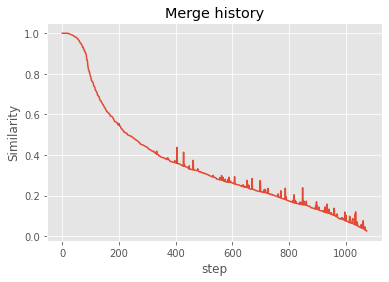

In [82]:
plt.plot(cluster_merge_sim)
plt.title("Merge history")
plt.xlabel("step")
plt.ylabel("Similarity")
plt.savefig("cluster result.png")
plt.show()

In [83]:
for k, v in clustering_result.items():
    v.sort()
with open("{}.txt".format(number_of_cluster), "w") as f:
    for k, v in clustering_result.items():
        for item in v:
            f.write(str(item)+"\n")
        f.write("\n")